In [55]:
import numpy as np
import pandas as pd

# df = pd.read_csv("FrankensteinFullForm.csv")
# df = df.as_matrix()
# print(df.shape)
# labels = pd.read_csv("LabelFrankensteinFullForm.csv", header = None)
# labels = labels.as_matrix()

<h1>Load Dataset</h1>

In [56]:
import pickle
from numpy import genfromtxt
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
import sklearn

TRAIN_RATIO = 0.8
AMOUNT_OF_CLASSES = 7


def loadDataset(path):
    inputdataset = (genfromtxt(path, delimiter=','))[1:,:]
    dataset = normalize(inputdataset)
    trainingAmount = int(TRAIN_RATIO * dataset.shape[0])
    training_dataset = dataset[0:trainingAmount,:]
    test_dataset = dataset[trainingAmount:,:]
    print("data: ", dataset.shape)
    return training_dataset.astype(float), test_dataset.astype(float)

def loadLabel(data_path, labels_path):
    dataset = (genfromtxt(data_path, delimiter=','))[1:,:]
#     dataset = normalize(dataset)
    trainingAmount = int(TRAIN_RATIO * dataset.shape[0])
    #     labels = pickle.load(INIT_PATH + path)
    with open(labels_path, 'rb') as handle:
        labels = pickle.load(handle)
    ###### TEMPORARY
    del labels[-1]
    ######
    all_labels = np.zeros((len(labels), AMOUNT_OF_CLASSES))
#     training_labels = np.zeros((trainingAmount, AMOUNT_OF_CLASSES))
#     test_labels = np.zeros((len(labels) - trainingAmount, AMOUNT_OF_CLASSES))
    label_counter = 0
    per_label = [0] * AMOUNT_OF_CLASSES
#     print(labels)
    for label in labels:
        tmp = np.zeros((1,AMOUNT_OF_CLASSES))
        if (label == "static"):
            tmp[0,0] = 1
            per_label[0] += 1
        elif (label == "move"):
            tmp[0,1] = 1
            per_label[1] += 1
        elif (label == "rot"):
            tmp[0,2] = 1
            per_label[2] += 1            
        elif (label == "frot"):
            tmp[0,3] = 1
            per_label[3] += 1
        elif (label == "light"):
            tmp[0,4] = 1
            per_label[4] += 1
        elif (label == "dynamiclight"):
            tmp[0,5] = 1
            per_label[5] += 1
        else:
            tmp[0,6] = 1
            per_label[6] += 1
        all_labels[label_counter,:] = tmp
#         if(label_counter < trainingAmount):
#             training_labels[label_counter,:] = tmp
#         else:
#             test_labels[label_counter - trainingAmount,:] = tmp
        label_counter += 1
    dataset, all_labels = shuffle(dataset, all_labels, random_state=0)
    return assignData(dataset, all_labels)
    
#     train_dataset = dataset[0:trainingAmount,:]
#     test_dataset = dataset[trainingAmount:,:]
#     print("data: ", dataset.shape)
    
#     train_labels = all_labels[:trainingAmount,:]
#     test_labels = all_labels[trainingAmount:,:]
    
#     print(", ".join([definition[i] + ": " + str(per_label[i]) for i in range (len(per_label))]))
#     return train_dataset.astype(float), test_dataset.astype(float),train_labels, test_labels

In [57]:
def assignData(data,labels):
    UNKNOWN_AMOUNT = 5
    train_amount = int(data.shape[0] * TRAIN_RATIO)
    AMOUNT_PER_CLASS = int((data.shape[0] - UNKNOWN_AMOUNT) * TRAIN_RATIO)
    class_count = [0] * train_amount
    train_data = []
    test_data = []
    train_labels = []
    test_labels = []

    for i in range (data.shape[0]):
        if(len(train_data) == train_amount):
            test_data.append(data[i])
            test_labels.append(labels[i])
        else:
            index = np.argmax(data[i])
            if(index == AMOUNT_OF_CLASSES - 1):
                test_data.append(data[i])
                test_labels.append(labels[i])
            if( class_count[index] < AMOUNT_PER_CLASS) :
                train_data.append(data[i])
                train_labels.append(labels[i])
                class_count[index] += 1
            else:
                test_data.append(data[i])
                test_labels.append(abels[i])
    return np.asarray(train_data), np.asarray(test_data), np.asarray(train_labels), np.asarray(test_labels)
                    

In [58]:
train_data, test_data, train_labels, test_labels = loadLabel("../unnormres.csv","LabelFrankensteinFullForm.p")
print(train_labels.dtype)
print(train_data.shape)
print(test_data.shape)
print(train_labels.shape)
print(test_labels.shape)
# print(train_labels)
print(np.sum(train_labels,axis=0))

float64
(110, 10)
(28, 10)
(110, 7)
(28, 7)
[19. 16. 17. 17. 18. 18.  5.]


In [64]:
# with open("../unnormFrankensteinFullForm.csv") as f:
with open("../unnormres.csv") as f:
    lines = (line for line in f if not line.startswith('#'))
    dataset = np.loadtxt(lines, delimiter=',', skiprows=1)
definition = ['static', 'move', 'rot', 'frot', 'light', 'dynamiclight','unknown']
scaler = StandardScaler(copy=True)
scaler.fit(dataset)

def normalize(dataset):
    datasetTmp = scaler.transform(dataset)
    return datasetTmp
dataset = normalize(dataset)

In [65]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils
from keras import optimizers

In [66]:
model = Sequential()

model.add(Dense(7, activation='linear', input_dim=10))
model.add(Dense(128,activation='linear'))
model.add(Dense(256, activation='linear'))
model.add(Dense(128, activation='linear'))
model.add(Dense(64, activation='linear'))
model.add(Dense(7, activation='softmax'))

In [67]:
# opti = optimizers.SGD(lr=0.0002, decay=1e-6, momentum=0.9, nesterov=True)
opti =optimizers.Adam(beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='binary_crossentropy', optimizer=opti, metrics=['accuracy'])
# model.compile(loss='MSE', optimizer=opti, metrics=['accuracy'])

In [68]:
model.fit(normalize(train_data),train_labels,batch_size=1, epochs=400, verbose=1)

Epoch 1/400
110/110 [==============================] - 1s 5ms/step - loss: 0.3669 - acc: 0.8571
Epoch 2/400
110/110 [==============================] - 0s 1ms/step - loss: 0.3334 - acc: 0.8688
Epoch 3/400
110/110 [==============================] - 0s 1ms/step - loss: 0.2626 - acc: 0.8883
Epoch 4/400
110/110 [==============================] - 0s 1ms/step - loss: 0.2506 - acc: 0.9026
Epoch 5/400
110/110 [==============================] - 0s 1ms/step - loss: 0.2631 - acc: 0.8922
Epoch 6/400
110/110 [==============================] - 0s 1ms/step - loss: 0.2506 - acc: 0.8974
Epoch 7/400
110/110 [==============================] - 0s 1ms/step - loss: 0.2200 - acc: 0.9065
Epoch 8/400
110/110 [==============================] - 0s 1ms/step - loss: 0.2323 - acc: 0.8974
Epoch 9/400
110/110 [==============================] - 0s 1ms/step - loss: 0.2451 - acc: 0.8961
Epoch 10/400
110/110 [==============================] - 0s 1ms/step - loss: 0.2334 - acc: 0.8961
Epoch 11/400
110/110 [=================

In [69]:
score = model.evaluate(normalize(test_data), test_labels, verbose=0)
print(score)

[0.1425788402557373, 0.943877637386322]


In [70]:
# serialize model to YAML
model_yaml = model.to_yaml()
with open("opticflow-optimized3.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)
# serialize weights to HDF5
model.save_weights("opticflow-optimized3.h5")
print("Saved model to disk")


Saved model to disk


In [71]:
from keras.models import model_from_yaml
# load YAML and create model
yaml_file = open('opticflow-optimized3.yaml', 'r')
loaded_model_yaml = yaml_file.read()
yaml_file.close()
loaded_model = model_from_yaml(loaded_model_yaml)
# load weights into new model
loaded_model.load_weights("opticflow-optimized3.h5")
print("Loaded model from disk")

# evaluate loaded model on test data
# loaded_model.compile(loss='MSE', optimizer=opti, metrics=['accuracy'])
loaded_model.compile(loss='binary_crossentropy', optimizer=opti, metrics=['accuracy'])
# score = loaded_model.evaluate(test_data, test_labels, verbose=0)
score = loaded_model.evaluate(normalize(test_data), test_labels, verbose=0)

print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
acc: 94.39%


In [ ]:
definition = ['static', 'move', 'rot', 'frot', 'light', 'dynamiclight','unknown']

for test_num in range (50):
    lol = normalize(train_data[test_num].reshape(1,-1))
    lol_label = train_labels[test_num]
    # print(lol.shape)
    # print(lol, lol_label)
    prediction = loaded_model.predict(lol.reshape(1,10))
    print(definition[np.argmax(prediction[0])])
    print(definition[np.argmax(lol_label)])
    print("-----------------------------------------------")

In [106]:
preds = []
ground = []
for i in range (test_data.shape[0]):
    datum = normalize(test_data[i].reshape(1,-1))
    ground.append(np.argmax(test_labels[i,:]))
    preds.append(np.argmax(loaded_model.predict(datum.reshape(1,10))[0]))

Confusion matrix, without normalization
[[3 0 0 0 0 0 0]
 [0 7 0 0 0 1 0]
 [0 0 3 1 0 0 0]
 [0 0 0 4 0 0 0]
 [0 0 0 0 2 2 1]
 [0 1 0 0 0 3 0]
 [0 0 0 0 0 0 0]]
Normalized confusion matrix
[[1.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.88 0.   0.   0.   0.12 0.  ]
 [0.   0.   0.75 0.25 0.   0.   0.  ]
 [0.   0.   0.   1.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.4  0.4  0.2 ]
 [0.   0.25 0.   0.   0.   0.75 0.  ]
 [ nan  nan  nan  nan  nan  nan  nan]]


/home/bon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


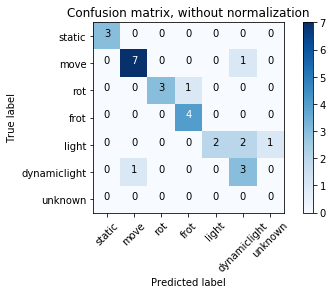

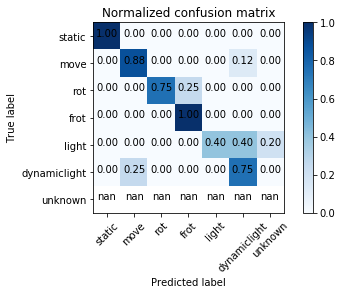

In [107]:
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(ground, preds)
np.set_printoptions(precision=2)
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=definition,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=definition, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [73]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np

BUFFER_SIZE = 100
WIDTH = 1280
HEIGHT = 720
video_count = 0

In [74]:
def calculate_n_of_hsv(frame_sq,n):
    sum_n = 0
    var_n = 0
    for frame in frame_sq:
        var_n += np.var(frame[:,:,n])# / (np.mean(frame[:,:,n]) * 1
        sum_n += np.sum(frame[:,:,n])

    avg_n = sum_n/ (len(frame_sq) * frame_sq[0].shape[0] * frame_sq[0].shape[1])
    return np.array([avg_n ,var_n])
def calculate_comp(frame_sq):
    sum_comp = 0
    for i in range(len(frame_sq)):
        if(i != 0):
            sum_comp += compare_img(frame_sq[i], frame_sq[i-1])
#         if(i == 1): print(compare_img(frame_sq[i], frame_sq[i-1]))
    sum_comp /= (len(frame_sq) - 1)
    return sum_comp
def calculate_opticFlow(frame_sq):
    prvs = cv2.resize(frame_sq[0],(0,0),fx=0.5,fy=0.5)
    mag_sum = 0
    ang_sum = 0
    var_mag = 0
    var_ang = 0
    for i in range(1,len(frame_sq)):
        frame2 = frame_sq[i]
        next = cv2.resize(frame2, (0,0), fx=0.5, fy=0.5) 
        flow = cv2.calcOpticalFlowFarneback(prvs,next, None, 0.5, 3, 15, 3, 5, 1.2, 0)
        mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])
        mag = cv2.normalize(mag,None,0,1,cv2.NORM_MINMAX)
        ang = np.absolute(cv2.normalize(ang,None,-1,1,cv2.NORM_MINMAX))
        mag_sum = np.sum(mag)
        ang_sum = np.sum(ang)
        var_mag += np.var(mag)
        var_ang += np.var(ang)
    mag_sum /= (BUFFER_SIZE * WIDTH * HEIGHT)
    ang_sum /= (BUFFER_SIZE * WIDTH * HEIGHT)
    var_mag /= BUFFER_SIZE
    var_ang /= BUFFER_SIZE
    return np.array([mag_sum, ang_sum, var_mag, var_ang])
def calculate_opticflow_of_pair(prvs,next):
    flow = cv2.calcOpticalFlowFarneback(prvs,next, None, 0.5, 3, 15, 3, 5, 1.2, 0)
    return flow
def calculate_opticflow_final(sq):
    mag_sum = 0
    ang_sum = 0
    var_mag = 0
    var_ang = 0
    for flow in sq:
        mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])
        mag = cv2.normalize(mag,None,0,1,cv2.NORM_MINMAX)
        ang = np.absolute(cv2.normalize(ang,None,-1,1,cv2.NORM_MINMAX))
        mag_sum = np.sum(mag)
        ang_sum = np.sum(ang)
        var_mag += np.var(mag)
        var_ang += np.var(ang)
    mag_sum /= (BUFFER_SIZE * WIDTH * HEIGHT)
    ang_sum /= (BUFFER_SIZE * WIDTH * HEIGHT)
    var_mag /= BUFFER_SIZE
    var_ang /= BUFFER_SIZE
    return np.array([mag_sum, ang_sum, var_mag, var_ang])

In [75]:
def compare_img(img1,img2):
    img1 = normalize_gray(img1)
    img2 = normalize_gray(img2)
    diff = img1 - img2
    m_norm = np.sum(abs(diff))
#     return m_norm
    return 0
def normalize_frame(frame):
    return frame/255

def normalize_gray(frame):
    rng = np.max(frame) - np.min(frame)
    amin = np.min(frame)
    return (frame-amin)/rng #range from [0,1]
def createDataset(data):
    dataset = data[0].copy()
    data.remove(data[0])
    for datum in data:
        dataset = np.append(dataset, datum, axis = 1)
    return dataset
def createTSV(dataset,filename):
    dataset = (dataset.copy()).astype(str)
#     datasetName = "dataset" + str(dataset_no) + ".tsv"
    datasetName = filename + ".tsv"
    file = open(datasetName, "w")
#     file.write("h\ts\tv\tframe_edges_comp\tframe_comp\n")
    for i in range(dataset.shape[0]):
        file.write("\t".join(dataset[i,:].tolist()))
        file.write("\n")
#         if(i + 1 != dataset.shape[0]):
#             file.write("\n")
    file.close()
    return
def createTSVLabel(dataset,filename):
    dataset = (dataset.copy()).astype(str)
#     datasetName = "label" + str(dataset_no) + ".tsv"
    datasetName = filename
    file = open(datasetName, "w")
    file.write("havg\thv\tsavg\tsv\tvavg\tvv\tmagavg\tmagv\tangavg\tangv\n")
    for i in range(dataset.shape[0]):
        file.write("\t".join(dataset[i,:].tolist()))
        file.write("\n")
#         if(i + 1 != dataset.shape[0]):
#             file.write("\n")
    file.close()
    return


In [76]:
def _normalize(frame):
#     print("input: ", frame)
    new_frame = scaler.transform(frame.reshape(1,-1))
#     new_frame = frame.reshape(1,-1)
#     print("output: ",new_frame)
    return new_frame

In [77]:
# def process(frame_sq,frame_sq_gray):
def process(frame_sq, opticflow_results):
    h = calculate_n_of_hsv(frame_sq,0)
    s = calculate_n_of_hsv(frame_sq,1)
    v = calculate_n_of_hsv(frame_sq,2)
#     opticFlow = calculate_opticFlow(frame_sq_gray)
    opticFlow = calculate_opticflow_final(opticflow_results)
    return _normalize(np.append(h,np.append(s,np.append(v,opticFlow))))
def predict(output):
    prediction = loaded_model.predict(output)
    print("confidence: " + str(prediction))
    return(definition[np.argmax(prediction[0])])

In [ ]:
import numpy as np
import cv2
import sys
from sklearn import preprocessing

frame_sq = []
frame_sq_gray = []
opticflow_buffer = []
opticflow_results = []
BUFFER_SIZE = 100
# cap = cv2.VideoCapture("../doit3/5.avi")
cap = cv2.VideoCapture(0)
video_count = 0
while(True):
    ret, frame = cap.read()
    hsv = cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)  
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    opticflow_buffer.append(cv2.resize(gray, (0,0), fx=0.5, fy=0.5))
    if(len(opticflow_buffer) == 2):
        opticflow_results.append(calculate_opticflow_of_pair(opticflow_buffer[0], opticflow_buffer[1]))
        del opticflow_buffer[0]
    if(video_count == 0):
        WIDTH = int(cap.get(3))
        HEIGHT = int(cap.get(4))
        video_count += 1
    frame_sq.append(normalize_frame(hsv))
#     frame_sq_gray.append(normalize_frame(gray))
    if(len(frame_sq) >= BUFFER_SIZE):
#         output = process(frame_sq, frame_sq_gray)
        output = process(frame_sq, opticflow_results)
        predictt = predict(output)
        sys.stdout.write("\r" + predictt)
        sys.stdout.flush()        
#         del frame_sq[0]
        frame_sq = []
        frame_sq_gray = []
        opticflow_buffer = []
        opticflow_results = []
#         break
    cv2.imshow('frame',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    
cap.release()
cv2.destroyAllWindows()

confidence: [[3.06e-01 6.93e-01 1.07e-11 1.57e-06 5.11e-05 3.65e-04 2.73e-05]]
moveconfidence: [[9.72e-01 2.78e-02 1.45e-13 4.00e-08 2.81e-09 1.14e-08 4.48e-08]]
staticconfidence: [[1.12e-06 1.00e+00 8.22e-13 4.37e-09 2.34e-07 4.94e-05 3.04e-08]]
moveconfidence: [[3.62e-04 3.40e-03 1.41e-07 4.40e-03 2.45e-01 5.44e-01 2.03e-01]]
dynamiclightconfidence: [[9.98e-01 1.54e-03 3.44e-12 1.11e-06 1.09e-07 1.59e-07 3.05e-06]]
staticconfidence: [[1.00e+00 2.81e-15 3.40e-27 1.01e-19 9.60e-26 1.83e-27 4.32e-21]]
staticconfidence: [[5.44e-23 2.54e-17 5.46e-05 5.71e-04 9.48e-01 2.31e-02 2.81e-02]]
lightconfidence: [[7.95e-26 6.69e-24 8.55e-10 6.61e-07 9.98e-01 5.52e-04 1.86e-03]]
lightconfidence: [[3.77e-21 1.63e-15 4.00e-06 2.94e-03 6.48e-01 9.33e-02 2.56e-01]]
lightconfidence: [[1.00e-10 8.51e-04 7.68e-04 7.74e-01 2.25e-02 5.73e-02 1.44e-01]]
frotconfidence: [[8.10e-20 1.49e-08 2.82e-02 4.67e-01 1.98e-01 2.18e-01 8.89e-02]]
frotconfidence: [[4.18e-16 2.60e-09 5.76e-02 9.38e-01 1.59e-04 1.39e-05 4.

In [ ]:
definition = ['static', 'move', 'rot', 'frot', 'light', 'dynamiclight','unknown']


In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()